In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Membaca Dataset**

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

***TASK 1***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
73177,City Hotel,1,94,2019,October,33,16,0,2,2,...,0,No Deposit,9.0,NaN,0,Personal,112.50,0,0,Canceled
97531,City Hotel,0,75,2018,November,38,14,0,4,2,...,0,No Deposit,9.0,NaN,0,Personal,149.40,0,3,Check-Out
43062,City Hotel,0,5,2017,November,38,14,1,0,1,...,1,No Deposit,NaN,40.0,0,Personal,65.00,0,0,Check-Out
112461,City Hotel,0,18,2019,July,21,22,1,1,2,...,0,No Deposit,315.0,NaN,0,Family,120.00,0,1,Check-Out
118528,City Hotel,0,154,2019,October,33,17,1,3,2,...,0,No Deposit,52.0,NaN,0,Personal,80.10,0,1,Check-Out
33906,Resort Hotel,0,39,2019,May,9,3,1,2,2,...,0,No Deposit,467.0,NaN,0,Family,57.60,0,0,Check-Out
109830,City Hotel,0,11,2019,June,15,14,1,2,2,...,0,No Deposit,NaN,NaN,0,Family,124.50,0,0,Check-Out
7371,Resort Hotel,1,199,2018,October,32,6,2,1,2,...,0,No Deposit,240.0,NaN,0,Personal,262.00,0,0,Canceled
59261,City Hotel,1,147,2018,December,44,24,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,178.59,0,0,Canceled
61903,City Hotel,1,16,2018,February,53,28,2,4,2,...,0,Non Refund,3.0,NaN,0,Personal,76.67,0,0,Canceled


In [5]:
#check duplicated data
df.duplicated().sum()

33261

In [8]:
#copy data

df2 = df.copy()

**Data Processing** 

In [9]:
# Cek total data yang kosong
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Kesimpulan Sementara : 

1. Terdapat 4 kolom yang memiliki missing value , diantaranya adalah city, children, agent, company.
2. Mengisi nilai kolom diatas menggunakan nilai 0 pada kolom ( children, agent, company ) dan unknown untuk kolom city, sehingga tidak ada nilai missing value.

In [10]:
#drop dan cek kembali data yang duplikat
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [9]:
#cek data setelah drop data yang duplikat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86125 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [11]:
#cek data yang kosong setelah melakukan drop data yang duplikat 

df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [12]:
#Mengisi kolom yang memiliki missing value menggunakan 0 untuk kolom bertipe data numerik dan unknown untuk kolom bertipe data object

df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('unknown')
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

**Cek kolom yang sudah di isi dengan nilai 0 dan unknown**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [14]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Kesmipulan : 

1. Kolom yang memiliki nilai null sudah berhasil di isi dengan nilai 0 sehingga tidak ada lagi kolom yang kosong.

In [16]:
#mengubah kolom bertipe data float menjadi numerik
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  meal                           

**Mengatasi data yang tidak sesuai**

In [17]:
# membagi data berdasarkan type datanya
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Data category:  ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']


In [18]:
df[numerical_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000
mean,0.275587,79.246224,2018.215467,26.796433,15.806511,1.009753,2.633225,1.878554,0.140278,0.010984,0.039499,0.030570,0.186569,0.271987,81.199166,10.800021,0.645114,106.634109,0.085233,0.705059
std,0.446812,85.498774,0.683948,13.675130,8.840436,1.033402,2.058316,0.627558,0.458337,0.114421,0.194780,0.371465,1.744405,0.729529,109.964005,53.484435,9.282699,55.175319,0.283070,0.833525
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.750000,0.000000,1.000000
75%,1.000000,124.000000,2019.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.510000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
df[category_cols].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,86129,86129,86129,86129,86129,86129,86129,86129,86129
unique,2,12,5,178,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,52575,11150,67088,26903,51393,68141,85024,71648,62393


In [20]:
pd.unique(df['meal'])

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [21]:
len(df[df['meal'] == 'Undefined'])

454

In [22]:
df.shape

(86129, 29)

In [23]:
# drop nilai "undefined" ganti dengan No Meal pada kolom meal
df["meal"].replace("Undefined", "No Meal", inplace=True)

In [24]:
pd.unique(df['meal'])
df['meal'].value_counts()

Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

In [25]:
df.shape

(86129, 29)

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out


In [27]:
# Menghapus data sebelumnya dengan data 0 guest dan 0 night 
# Membuat kolom baru dengan nama  'total_guests' dari kombinasi kolom 'adults', 'children', 'babies' columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))

# membuat kolom 'stay_duration' dari kombinasi kolom 'stays_in_weekend_nights' dan 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))


df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

print('sebelum pre-processing:', df.shape[0])
print('setelah pre-processing:', df_clean.shape[0])

Data with 0 guest: 165 out of 86129 all data
Data with 0 night: 645 out of 86129 all data
sebelum pre-processing: 86129
setelah pre-processing: 85378


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                           

In [29]:
#simpan dataframe baru ke csv

df_clean.to_csv('Data_Hotel_Cleaning.csv', index=False)

**TASK 2**

**Monthly Hotel Booking Analysis Based on Hotel Type**

In [30]:
df2 = df_clean.copy()

In [31]:
df2_mh = df2.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2_mh.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df2_mh

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,3514
1,City Hotel,August,2,4908
2,City Hotel,December,2,4009
3,City Hotel,February,2,2952
4,City Hotel,January,2,2849
5,City Hotel,July,2,5321
6,City Hotel,June,2,5017
7,City Hotel,March,2,2674
8,City Hotel,May,2,4777
9,City Hotel,November,2,4040


In [32]:
# Kelkulasi rata rata oder hotel perbulan selama beberapa tahun 
df2_mh['Average_Booking'] = round(df2_mh['total_booking']/df2_mh['unique_year'])
df2_mh

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking
0,City Hotel,April,2,3514,1757.0
1,City Hotel,August,2,4908,2454.0
2,City Hotel,December,2,4009,2004.0
3,City Hotel,February,2,2952,1476.0
4,City Hotel,January,2,2849,1424.0
5,City Hotel,July,2,5321,2660.0
6,City Hotel,June,2,5017,2508.0
7,City Hotel,March,2,2674,1337.0
8,City Hotel,May,2,4777,2388.0
9,City Hotel,November,2,4040,2020.0


In [34]:
order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2_mh['month'] = df2_mh['arrival_month'].str[:3]
df2_mh['month'] = pd.Categorical(df2_mh['month'], categories=order_months, ordered=True)

df2_mh

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking,month
0,City Hotel,April,2,3514,1757.0,Apr
1,City Hotel,August,2,4908,2454.0,Aug
2,City Hotel,December,2,4009,2004.0,Dec
3,City Hotel,February,2,2952,1476.0,Feb
4,City Hotel,January,2,2849,1424.0,Jan
5,City Hotel,July,2,5321,2660.0,Jul
6,City Hotel,June,2,5017,2508.0,Jun
7,City Hotel,March,2,2674,1337.0,Mar
8,City Hotel,May,2,4777,2388.0,May
9,City Hotel,November,2,4040,2020.0,Nov


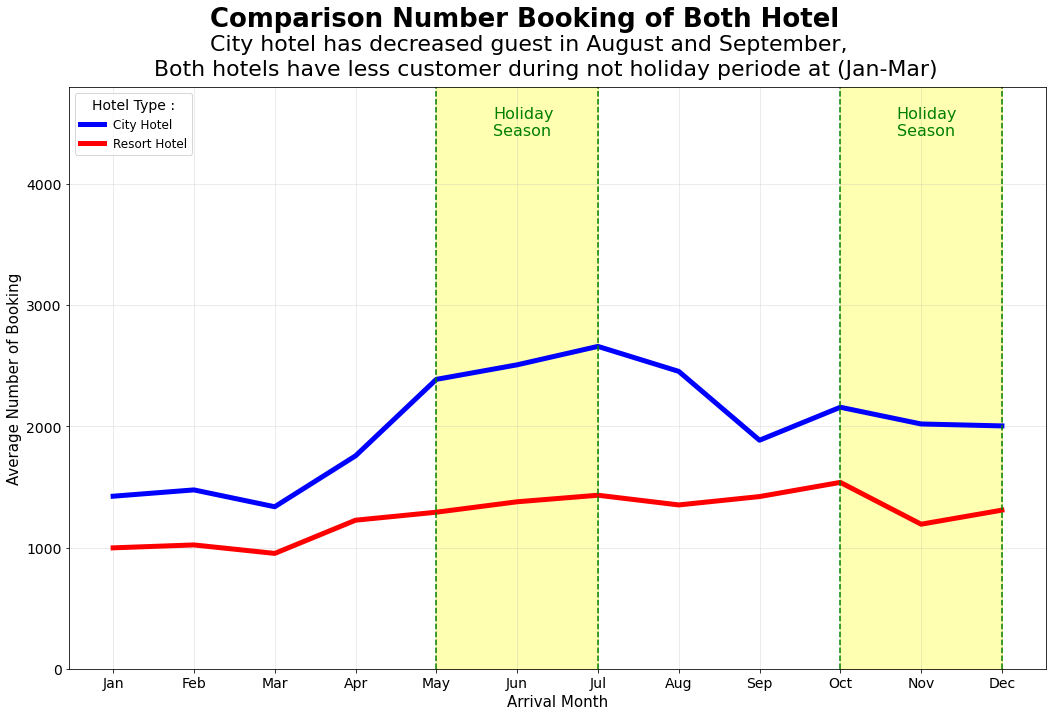

In [35]:
# visualisasi rata rata booking order kedua hotel tiap bulannya 
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='Average_Booking', hue='hotel_type',
             size='hotel_type', sizes=(5, 5), data=df2_mh, palette= ['blue', 'red'])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Hotel Type :', title_fontsize=14, prop={'size':12}, fontsize='x-large')

plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0,4800)

plt.text(x=1.2, y=5300, s='Comparison Number Booking of Both Hotel', fontsize=26, fontweight='bold')
plt.text(x=1.2, y=5100, s='City hotel has decreased guest in August and September,', fontsize=22)
plt.text(x=0.5, y=4900, s='Both hotels have less customer during not holiday periode at (Jan-Mar)', fontsize=22)

plt.axvline(4, ls='--', color='green')
plt.axvline(6, ls='--', color='green')
plt.stackplot(np.arange(4,7,1),[[4800]], color='yellow', alpha=0.3)
plt.text(x=4.7, y=4400, s='Holiday\nSeason', fontsize=16, color='green')

plt.axvline(9, ls='--', color='green')
plt.axvline(11, ls='--', color='green')
plt.stackplot(np.arange(9,12,1),[[4800]], color='yellow', alpha=0.3)
plt.text(x=9.7, y=4400, s='Holiday\nSeason', fontsize=16, color='green')

plt.tight_layout()

**TASK 3**

**Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [36]:
df3 = df_clean.copy()

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                           

<AxesSubplot:xlabel='stay_duration', ylabel='Count'>

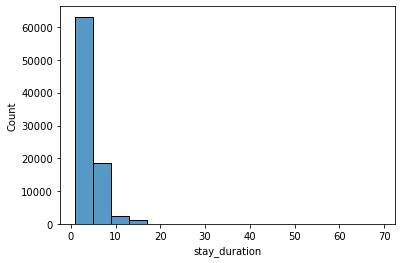

In [42]:
sns.histplot(data=df3, x='stay_duration',binwidth=4)

In [43]:
df3['total_nights_group'] = np.where(df3['stay_duration'] > 21, 21, 
                                       np.where(df3['stay_duration'] > 14, 15, df3['stay_duration']))

In [44]:
df3['total_nights_group'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 13, 12, 21],
      dtype=int64)

In [46]:
df3_1 = df3.groupby(['hotel','is_canceled','total_nights_group']).agg({'arrival_date_month' : 'count'}).reset_index()
df3_1

,hotel,is_canceled,total_nights_group,arrival_date_month
0,City Hotel,0,1,7841
1,City Hotel,0,2,7374
2,City Hotel,0,3,9136
3,City Hotel,0,4,6440
4,City Hotel,0,5,2887
...,...,...,...,...
59,Resort Hotel,1,12,49
60,Resort Hotel,1,13,24
61,Resort Hotel,1,14,159
62,Resort Hotel,1,15,47


In [47]:
df3_pivot = df3_1.pivot_table(index=['hotel', 'total_nights_group'],
                                  columns=['is_canceled'],
                                  values=['arrival_date_month']).reset_index()
df3_pivot.columns = ['hotel','total_nights_group','not_canceled','canceled']
df3_pivot.head()

,hotel,total_nights_group,not_canceled,canceled
0,City Hotel,1,7841,2259
1,City Hotel,2,7374,3133
2,City Hotel,3,9136,4182
3,City Hotel,4,6440,3059
4,City Hotel,5,2887,1257


In [48]:
df3_pivot['pct_canceled'] = round(df3_pivot['canceled']*100.0/(df3_pivot['not_canceled']+df3_pivot['canceled']),2)
df3_pivot.head()

,hotel,total_nights_group,not_canceled,canceled,pct_canceled
0,City Hotel,1,7841,2259,22.37
1,City Hotel,2,7374,3133,29.82
2,City Hotel,3,9136,4182,31.40
3,City Hotel,4,6440,3059,32.20
4,City Hotel,5,2887,1257,30.33


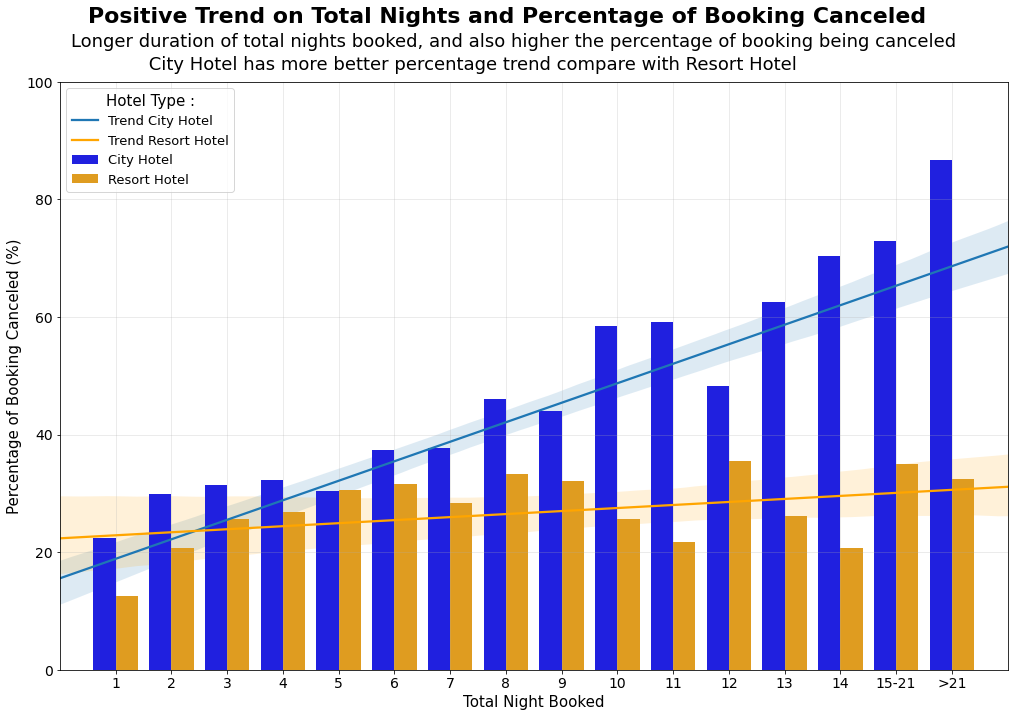

In [67]:
# visualisasi dari analisis total menginap dan pembatalan pemesanan hotel
plt.figure(figsize=(15,10))
sns.barplot(x='total_nights_group', y='pct_canceled', hue='hotel', data=df3_pivot, palette= ['blue', 'orange'])
sns.regplot(x='total_nights_group', y='pct_canceled', data=df3_pivot[df3_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x='total_nights_group', y='pct_canceled', data=df3_pivot[df3_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', color='orange', truncate=False)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Hotel Type :', title_fontsize=15, prop={'size':13})

plt.xticks(range(0,16,1), labels=[str(x) for x in range(1,15,1)]+['15-21','>21'])
plt.xlabel('Total Night Booked', fontsize=15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)
plt.ylim(0, 100)
plt.xlim(-1, 16)

plt.text(x=-0.5, y=110, s='Positive Trend on Total Nights and Percentage of Booking Canceled', 
         fontsize=22, fontweight='bold')
plt.text(x=-0.8, y=106, s='Longer duration of total nights booked, and also higher the percentage of booking being canceled', 
         fontsize=18)
plt.text(x=0.5, y=102, s=' City Hotel has more better percentage trend compare with Resort Hotel', 
         fontsize=18)

plt.tight_layout()

**TASK 4**

**Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [70]:
df4 = df_clean.copy()

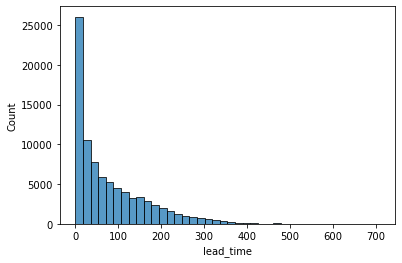

In [71]:
sns.histplot(data=df4, x='lead_time', bins=40);

In [72]:
print('maximum value of lead time :',df4['lead_time'].max())

maximum value of lead time : 709


In [73]:
df4['lead_times'] = np.where(df4['lead_time'] > 400, 401, df4['lead_time'])
df4['lead_times'].value_counts()

0      5633
1      3130
2      1891
3      1683
4      1538
       ... 
400       1
370       1
387       1
389       1
380       1
Name: lead_times, Length: 400, dtype: int64

In [74]:
bins = list(np.arange(0,max(df4['lead_times'])+30, 30))
print(bins)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420]


In [75]:
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
print(labels)

['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300', '300-330', '330-360', '360-390', '390-420']


In [76]:
df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels)
df4['lead_time_group'].value_counts()

0-30       33810
30-60      13091
60-90       9194
90-120      7094
120-150     5641
150-180     5184
180-210     3659
210-240     2625
240-270     1689
270-300     1218
300-330      956
330-360      602
390-420      376
360-390      239
Name: lead_time_group, dtype: int64

In [78]:
df4_1 = df4.groupby(['hotel','lead_time_group','is_canceled']).agg({'lead_times' : 'count'}).reset_index()
df4_1.head()

,hotel,lead_time_group,is_canceled,lead_times
0,City Hotel,0-30,0,16024
1,City Hotel,0-30,1,3927
2,City Hotel,30-60,0,5818
3,City Hotel,30-60,1,2884
4,City Hotel,60-90,0,4069


In [79]:
df4_pivot = df4_1.pivot_table(index=['hotel','lead_time_group'],
                                  columns=['is_canceled'],
                                  values=['lead_times']).reset_index()
df4_pivot.columns = ['hotel','lead_time_group','not_canceled','canceled']
df4_pivot.head()

,hotel,lead_time_group,not_canceled,canceled
0,City Hotel,0-30,16024,3927
1,City Hotel,30-60,5818,2884
2,City Hotel,60-90,4069,2088
3,City Hotel,90-120,3031,1684
4,City Hotel,120-150,2288,1312


In [80]:
df4_pivot['pct_canceled'] = round(df4_pivot['canceled']*100.0/(df4_pivot['not_canceled']+df4_pivot['canceled']),2)
df4_pivot.head()

,hotel,lead_time_group,not_canceled,canceled,pct_canceled
0,City Hotel,0-30,16024,3927,19.68
1,City Hotel,30-60,5818,2884,33.14
2,City Hotel,60-90,4069,2088,33.91
3,City Hotel,90-120,3031,1684,35.72
4,City Hotel,120-150,2288,1312,36.44


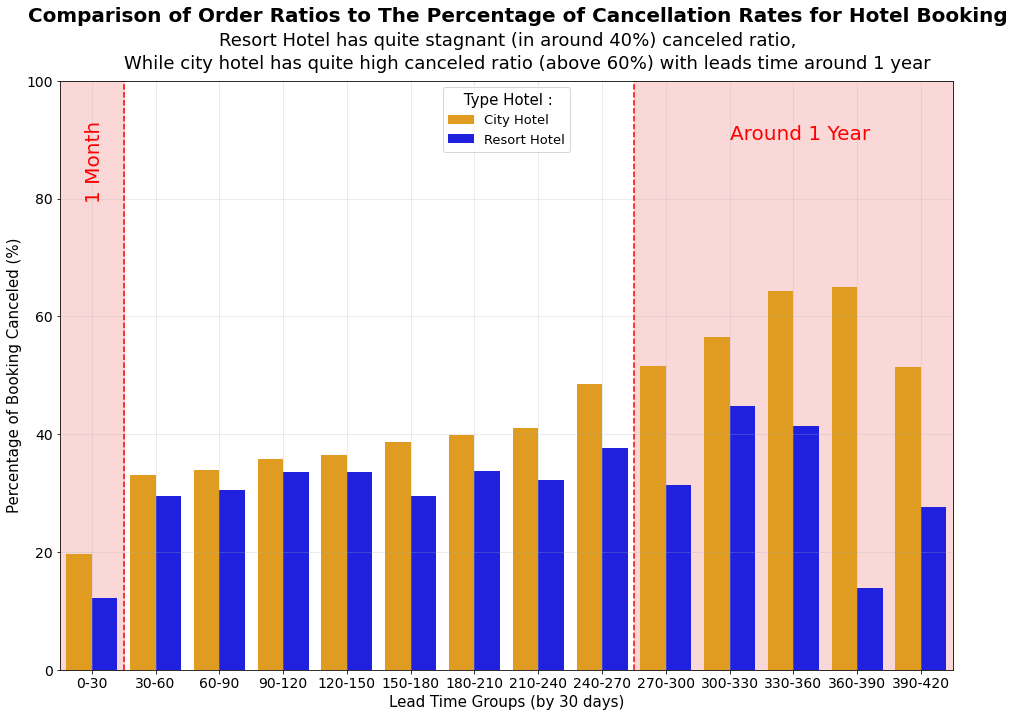

In [87]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel', data=df4_pivot, palette= ['orange', 'blue'])

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(alpha=0.3)
plt.legend(title=' Type Hotel :', title_fontsize=15, prop={'size':13}, loc='upper center')

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)
plt.ylim(0,100)
plt.xlim(-0.5,13.5)

plt.axvline(0.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,1.5,1),[[100]], color='lightcoral', alpha=0.3)
plt.text(x=-0.1, y=80, s='1 Month', fontsize=20, color='red', rotation=90)

plt.axvline(8.5, ls='--', color='red')
plt.stackplot(np.arange(8.5,14.5,1),[[100]], color='lightcoral', alpha=0.3)
plt.text(x=10, y=90, s='Around 1 Year', fontsize=20, color='red')

plt.text(x=-1.0, y=110, s='Comparison of Order Ratios to The Percentage of Cancellation Rates for Hotel Booking', 
         fontsize=20, fontweight='bold')
plt.text(x=2.0, y=106, s='Resort Hotel has quite stagnant (in around 40%) canceled ratio,', 
         fontsize=18)
plt.text(x=0.5, y=102, s='While city hotel has quite high canceled ratio (above 60%) with leads time around 1 year', 
         fontsize=18)

plt.tight_layout()